# 概率

## 基本概率论

验证大数定律：

In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

在统计学中，我们把从概率分布中抽取样本的过程称为抽样（sampling）。笼统来说，可以把分布（distribution）看作是对事件的概率分配，稍后我们将给出的更正式定义。将概率分配给一些离散选择的分布称为多项分布（multinomial distribution）

下面就验证一下在多次掷骰子后的大数定律：

In [3]:
fair_probs = torch.ones([6]) / 6 # 指代每个面概率均为 1/6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 1., 0., 0., 0., 0.])

上面的代码中，多项分布掷骰子，每个面向上的概率均为 $\frac{1}{6}$，而 $1$ 代表抽样（sample）只进行了一次。所以结果是：在六个可能的结果中，此次抽样抽中了二点向上。

下面我们加大抽样次数：

In [7]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts /= 1000
counts

tensor([0.1610, 0.1690, 0.1590, 0.1760, 0.1630, 0.1720])

简单计算可以得到 $\frac{1}{6} = 0.1667$，可以看出来结果还是相对接近的。

在上面的实验中，`sample()` 是没有参数的，也就是这组进行了 1000 次实验的实验只做了一组。现在我们做 500 组这样的实验，每组也都随机抽样 1000 次，看看每个面朝上的概率在大数模型下的概率收敛曲线：

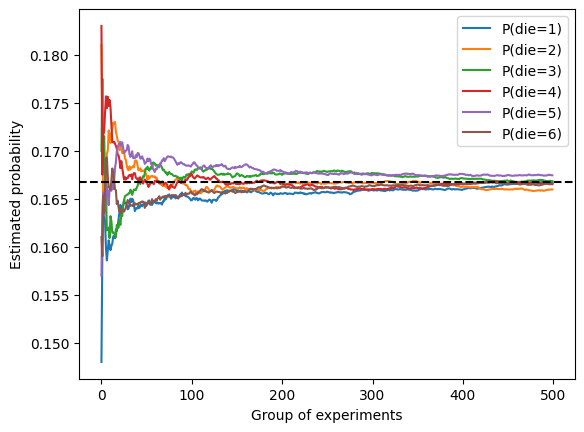

In [9]:
import matplotlib.pyplot as plt

counts = multinomial.Multinomial(1000, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

for i in range(6):
    plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
    
plt.xlabel('Group of experiments')
plt.ylabel('Estimated probability')
plt.axhline(y=0.1667, color='black', linestyle='dashed')
plt.legend()
plt.show()

### 概率论公理与随机变量

我觉得写得好：https://zh-v2.d2l.ai/chapter_preliminaries/probability.html#id3

## 处理多个随机变量

举一个更复杂的例子：图像包含数百万像素，因此有数百万个随机变量。 在许多情况下，图像会附带一个标签（label），标识图像中的对象。 我们也可以将标签视为一个随机变量。 我们甚至可以将所有元数据视为随机变量，例如位置、时间、光圈、焦距、ISO、对焦距离和相机类型。 所有这些都是联合发生的随机变量。 当我们处理多个随机变量时，会有若干个变量是我们感兴趣的。

然后理论部分就看[教程](https://zh-v2.d2l.ai/chapter_preliminaries/probability.html#id5)就好

## 练习

假设我们有一系列随机变量，例如 $A$、$B$ 和 $C$，其中 $B$ 只依赖于 $A$，而 $C$ 只依赖于 $B$，你能简化联合概率 $P(A, B, C)$ 吗？（提示：这是一个马尔可夫链。)

![pic_ans](../assets/ch2_6_1.png)